In [8]:
import numpy as np
from dataset import *
from keras.utils import to_categorical
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

temp = np.loadtxt('data4.txt',dtype=np.float32)
print(temp.shape)

temp_1 = temp[:,:10]
temp_2 = temp[:,10:]
print(temp_1.shape)
print(temp_2.shape)

X_train,y_train,X_val,y_val,X_test,y_test = load_data(temp_1,temp_2)
print(X_train[0,:])
print(y_train[0])
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(32900, 11)
(32900, 10)
(32900, 1)
[19. 12. 12. 11. 10.  4.  7.  3.  5.  3.]
[2.]
(27000, 10)
(27000, 1)
(3000, 10)
(3000, 1)


In [9]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,BatchNormalization,Softmax,Embedding
from keras.layers.core import Activation 
from dataset import *
import matplotlib.pyplot as plt

# N,D = X_train.shape
# N1,D1 = X_val.shape
# N2,D2 = X_test.shape
# X_train = X_train.reshape(49000,1,10)
# X_val = X_val.reshape(1000,1,10)
# X_text = X_test.reshape(20000,1,10)
# X_train = X_train[:5000,:]
# y_train = y_train[:5000,:]
# X_val = X_val[:500,:]
# y_val = y_val[:500,:]


X_train = np.expand_dims(X_train,axis=2)
X_val = np.expand_dims(X_val,axis=2)
print(X_train.shape)

device = '/device:GPU:0'

model = None
neurons1 = 512
neurons2 = 256
hidden_size = 128
batch_size = 100

with tf.device(device):
#     initializer = tf.variance_scaling_initializer(scale=2.0)
    model = Sequential()
#     model.add(Embedding(601,64,input_length = 10))# 返回N,10,10
    model.add(LSTM(units=neurons1,stateful=True,return_sequences=True,batch_input_shape=
                  (batch_size,10,1)))
    model.add(LSTM(units=neurons2,stateful=True,return_sequences=True,batch_input_shape=
                  (batch_size,10,1)))
    model.add(LSTM(units=hidden_size,stateful=True,batch_input_shape=
                  (batch_size,10,1)))
    model.add(Dense(units=32))
    model.add(Dense(units=1))
#     model.add(Activation('relu'))
#     model.add(BatchNormalization())
#     model.add(Softmax())   

model.compile(loss="mse",optimizer="adam")


train_size = (X_train.shape[0]//batch_size)*batch_size
val_size = (X_val.shape[0]//batch_size)*batch_size
X_train, y_train = X_train[0:train_size], y_train[0:train_size]
X_val, y_val = X_val[0:val_size], y_val[0:val_size]
print(X_train.shape,y_train.shape,X_val.shape,y_val.shape)
for i in range(10):
    print(i)
    model.fit(X_train,y_train,batch_size=batch_size,epochs=1,validation_data=(X_val,y_val),
             shuffle=False)
    model.reset_states()



(27000, 10, 1)
(27000, 10, 1) (27000, 1) (3000, 10, 1) (3000, 1)
0
Train on 27000 samples, validate on 3000 samples
Epoch 1/1
27000/27000 [==============================] - 27s 993us/step - loss: 5.8247 - val_loss: 4.9967
1
Train on 27000 samples, validate on 3000 samples
Epoch 1/1
27000/27000 [==============================] - 23s 846us/step - loss: 4.6544 - val_loss: 4.9697
2
Train on 27000 samples, validate on 3000 samples
Epoch 1/1
27000/27000 [==============================] - 23s 845us/step - loss: 4.5342 - val_loss: 4.9806
3
Train on 27000 samples, validate on 3000 samples
Epoch 1/1
27000/27000 [==============================] - 23s 851us/step - loss: 4.5236 - val_loss: 4.9824
4
Train on 27000 samples, validate on 3000 samples
Epoch 1/1
27000/27000 [==============================] - 23s 851us/step - loss: 4.5231 - val_loss: 4.9366
5
Train on 27000 samples, validate on 3000 samples
Epoch 1/1
27000/27000 [==============================] - 23s 844us/step - loss: 4.4648 - val_loss: 

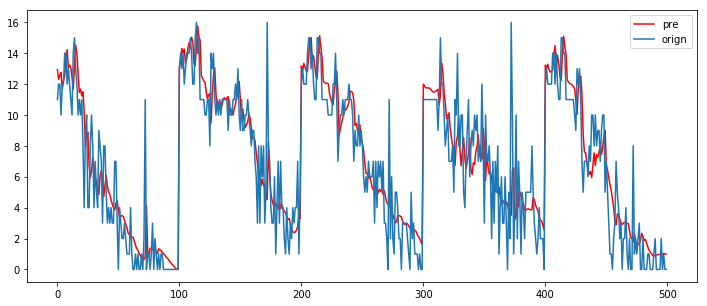

In [10]:

# X_test = X_test[:200,:]
# X_test = X_test.reshape(200,10)
# # X_test = X_test.reshape(200,1,10)
# predict_test = model.predict(X_test)
# predict = np.argmax(predict_test,axis = 1)
# y = np.argmax(y_test,axis=1)
# print(predict.shape)
# a=0
# for i in range(200):
#     if predict[i] == y[i]:
#         a += 1
# b = a/200
# print(b)
# a = np.array([0,0,0,0,0,0,0,0,0,0])
# a = a.reshape(1,1,10)
# b = model.predict(a)
# print(b)
# c = np.argmax(b,axis=1)
# print(
# print(y_val[:100])
pre = model.predict(X_val,batch_size=batch_size)
plt.figure(figsize=(12,5))
plt.plot(pre[:500],'r',label='pre')
plt.plot(y_val[:500],label='orign')
plt.legend()
plt.show()

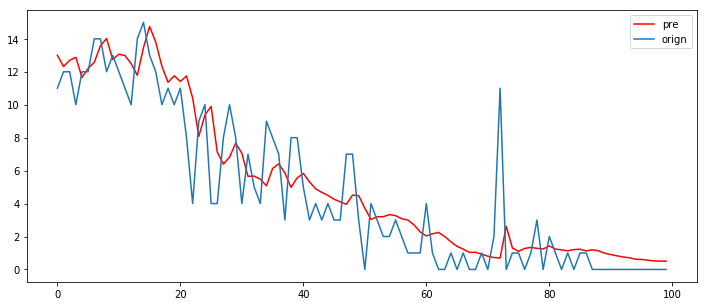

In [11]:
pre = model.predict(X_val,batch_size=batch_size)
plt.figure(figsize=(12,5))
plt.plot(pre[:100],'r',label='pre')
plt.plot(y_val[:100],label='orign')
plt.legend()
plt.show()

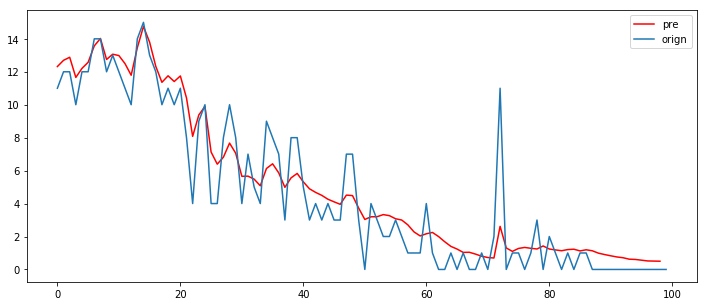

In [12]:
pre = model.predict(X_val,batch_size=batch_size)
plt.figure(figsize=(12,5))
plt.plot(pre[1:100],'r',label='pre')
plt.plot(y_val[:100],label='orign')
plt.legend()
plt.show()